# Basic data exploration

In [385]:
import pandas as pd
import numpy as np

In [386]:
s=pd.read_csv("may-jan.csv")

C:\Users\vaish\AppData\Local\Temp\ipykernel_23944\4029926062.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  s=pd.read_csv("may-jan.csv")


In [387]:
s.columns

Index(['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)', 'AC Voltage T/W/C(V)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)', 'Grid Power Factor',
       'Inverter Temperature(℃)', 'Inverter Status',
       'Generation Yesterday(kWh)', 'System Time'],
      dtype='object')

In [388]:
s['Inverter Status'].value_counts()

1022       32241
1022        5683
1025         499
1025         112
Standby       28
Name: Inverter Status, dtype: int64

In [389]:
x=s.columns
l=[]
for i in range(1,len(x)-1):
    l.append(s[x[i]].value_counts())
for i in l:
    print(i)

200.1    225
200.0    192
632.1    181
636.0    180
640.1    180
        ... 
137.8      1
385.5      1
433.6      1
124.4      1
179.5      1
Name: DC Voltage PV1(V), Length: 3442, dtype: int64
200.1    191
200.0    171
616.1    149
620.0    120
624.2    119
        ... 
184.2      1
410.5      1
348.0      1
214.5      1
422.0      1
Name: DC Voltage PV2(V), Length: 3364, dtype: int64
200.1    253
200.0    253
636.1    183
620.0    181
628.1    174
        ... 
430.9      1
311.5      1
142.4      1
162.1      1
170.8      1
Name: DC Voltage PV3(V), Length: 3508, dtype: int64
200.0    256
200.1    219
672.1    218
672.0    210
671.9    207
        ... 
135.2      1
385.9      1
472.1      1
122.8      1
174.0      1
Name: DC Voltage PV4(V), Length: 3478, dtype: int64
0.1     3130
0.2     1467
0.3     1321
0.4     1070
0.5      942
        ... 
10.5       2
10.3       1
11.6       1
10.1       1
10.8       1
Name: DC Current1(A), Length: 109, dtype: int64
0.1     2029
0.2      985
0.3

Conclusion:Alert details, Alert code, Grid power factor, Inverter status attributes doesnt have much unique values

In [390]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [391]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = s.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


corr_features = correlation(s, 0.7)
len(set(corr_features))

corr_features

s1=s.drop(corr_features,axis=1)

C:\Users\vaish\AppData\Local\Temp\ipykernel_23944\957711147.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = s.corr()


In [392]:
s1.columns

Index(['Time', 'DC Voltage PV1(V)', 'DC Current1(A)', 'AC Voltage R/U/A(V)',
       'Generation of Last Month (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'Total Generation (Active)(kWh)',
       'Grid Power Factor', 'Inverter Status', 'Generation Yesterday(kWh)',
       'System Time'],
      dtype='object')

In [393]:
s=s[['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)', 'AC Voltage T/W/C(V)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)',
       'Inverter Temperature(℃)',
       'Generation Yesterday(kWh)']]

# Converting to datetime

In [394]:
def obj_to_DT(s,x):
    s.loc[:,x] = s[x].astype('string')
    s[x]= pd.to_datetime(s[x],dayfirst=True)
    return s

In [395]:
s=obj_to_DT(s,'Time')
s.dtypes

C:\Users\vaish\AppData\Local\Temp\ipykernel_23944\1469766945.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  s.loc[:,x] = s[x].astype('string')


Time                                      datetime64[ns]
DC Voltage PV1(V)                                float64
DC Voltage PV2(V)                                float64
DC Voltage PV3(V)                                float64
DC Voltage PV4(V)                                float64
DC Current1(A)                                   float64
DC Current2(A)                                   float64
DC Current3(A)                                   float64
DC Current4(A)                                   float64
Total DC Input Power(W)                            int64
AC Voltage R/U/A(V)                              float64
AC Voltage S/V/B(V)                              float64
AC Voltage T/W/C(V)                              float64
AC Current R/U/A(A)                              float64
AC Current S/V/B(A)                              float64
AC Current T/W/C(A)                              float64
AC Output Total Power (Active)(W)                  int64
AC Output Frequency R(Hz)      

In [396]:
s.head(10)

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),...,AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Daily Generation (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),Inverter Temperature(℃),Generation Yesterday(kWh)
0,2022-05-02 05:55:00,92.2,165.4,94.8,86.5,0.1,0.1,0.1,0.1,43,...,0.0,0.0,20,50.00,3164,0.0,117029,80,32.9,126.9
1,2022-05-02 06:00:00,200.1,236.2,200.1,536.4,0.1,0.2,0.1,0.1,140,...,0.1,0.1,30,50.10,3164,0.0,117029,20,34.1,126.9
2,2022-05-02 06:05:00,207.8,344.2,216.1,536.4,0.1,0.2,0.1,0.1,164,...,0.2,0.2,40,50.11,3164,0.0,117029,30,34.4,126.9
3,2022-05-02 06:12:00,228.1,596.1,228.0,536.3,0.2,0.3,0.2,0.2,377,...,0.4,0.4,200,50.01,3164,0.0,117029,190,34.9,126.9
4,2022-05-02 06:17:00,240.1,608.1,240.1,536.6,0.2,0.3,0.2,0.2,385,...,0.5,0.5,160,50.06,3164,0.0,117029,160,35.3,126.9
5,2022-05-02 06:22:00,268.1,603.6,267.8,252.1,0.2,0.4,0.2,0.2,399,...,0.5,0.5,220,50.05,3164,0.1,117029,240,35.4,126.9
6,2022-05-02 06:27:00,548.0,611.8,523.9,452.3,0.3,0.5,0.3,0.3,763,...,0.9,0.9,500,50.03,3164,0.1,117029,480,35.7,126.9
7,2022-05-02 06:33:00,616.0,624.0,632.1,664.1,0.3,0.6,0.3,0.3,948,...,1.4,1.3,740,49.99,3164,0.1,117029,710,36.1,126.9
8,2022-05-02 06:38:00,628.1,628.0,628.3,660.0,0.4,0.8,0.4,0.4,1268,...,1.7,1.7,1080,50.06,3164,0.2,117029,1080,36.5,126.9
9,2022-05-02 06:43:00,627.8,635.3,628.1,667.7,0.6,1.0,0.6,0.5,1722,...,2.4,2.3,1540,50.01,3164,0.3,117029,1530,36.8,126.9


# Outlier analysis and removal

In [397]:
from datetime import date

In [398]:
dates=s
t=dates['Time'].apply(lambda x: x.date()).value_counts()# checking outliers
t

2022-06-07    174
2022-06-14    169
2022-06-08    168
2022-08-03    165
2022-06-05    163
             ... 
2022-11-28    102
2022-06-29     82
2022-11-27     31
2022-10-05     19
2022-10-06      5
Name: Time, Length: 273, dtype: int64

In [399]:
# ouliers dates
date_outliers=t.index[-4:]
print(date_outliers)

Index([2022-06-29, 2022-11-27, 2022-10-05, 2022-10-06], dtype='object')


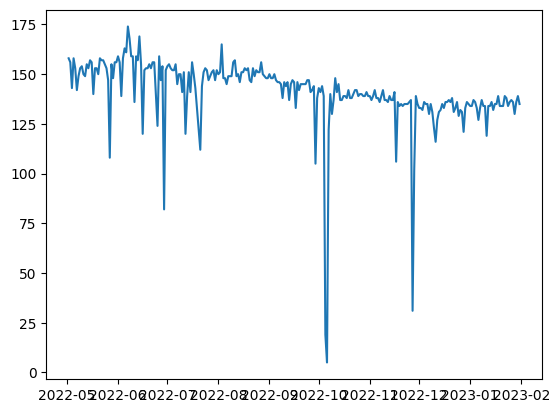

In [400]:
import matplotlib.pyplot as plt
t.plot()
plt.show()

In [401]:
outliersN=pd.read_csv("outliers3.csv") # outliers removed using excel
outliersN

C:\Users\vaish\AppData\Local\Temp\ipykernel_23944\1558332269.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  outliersN=pd.read_csv("outliers3.csv") # outliers removed using excel


,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),...,AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Daily Generation (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),Grid Power Factor,Inverter Temperature(℃),Inverter Status,Generation Yesterday(kWh),System Time
0,02-05-2022 05:55,92.2,165.4,94.8,86.5,0.1,0.1,0.1,0.1,43,...,50.00,3164,0.0,117029,80,1,32.9,1022,126.9,22-05-2002 06:16
1,02-05-2022 06:00,200.1,236.2,200.1,536.4,0.1,0.2,0.1,0.1,140,...,50.10,3164,0.0,117029,20,1,34.1,1022,126.9,22-05-2002 06:21
2,02-05-2022 06:05,207.8,344.2,216.1,536.4,0.1,0.2,0.1,0.1,164,...,50.11,3164,0.0,117029,30,1,34.4,1022,126.9,22-05-2002 06:26
3,02-05-2022 06:12,228.1,596.1,228.0,536.3,0.2,0.3,0.2,0.2,377,...,50.01,3164,0.0,117029,190,1,34.9,1022,126.9,22-05-2002 06:33
4,02-05-2022 06:17,240.1,608.1,240.1,536.6,0.2,0.3,0.2,0.2,385,...,50.06,3164,0.0,117029,160,1,35.3,1022,126.9,22-05-2002 06:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38503,31-01-2023 18:08,473.3,200.1,484.5,515.6,0.1,0.1,0.1,0.1,167,...,49.94,2975,100.0,145847,90,1,36.8,1022,90.6,23-01-1931 18:13
38504,31-01-2023 18:14,473.9,200.1,484.9,516.3,0.1,0.1,0.1,0.1,167,...,49.88,2975,100.0,145847,100,1,36.5,1022,90.6,23-01-1931 18:17
38505,31-01-2023 18:19,473.8,457.3,445.2,475.6,0.1,0.1,0.1,0.1,185,...,50.05,2975,100.0,145847,70,1,36.3,1022,90.6,23-01-1931 18:23
38506,31-01-2023 18:24,384.7,422.0,370.5,382.3,0.1,0.1,0.1,0.1,155,...,49.97,2975,100.0,145847,70,1,36.0,1022,90.6,23-01-1931 18:28


In [402]:
from datetime import time,date
outliersN['Time']= pd.to_datetime(outliersN['Time'],dayfirst=True)#converted time to string
outliersN.dtypes

Time                                      datetime64[ns]
DC Voltage PV1(V)                                float64
DC Voltage PV2(V)                                float64
DC Voltage PV3(V)                                float64
DC Voltage PV4(V)                                float64
DC Current1(A)                                   float64
DC Current2(A)                                   float64
DC Current3(A)                                   float64
DC Current4(A)                                   float64
Total DC Input Power(W)                            int64
AC Voltage R/U/A(V)                              float64
AC Voltage S/V/B(V)                              float64
AC Voltage T/W/C(V)                              float64
AC Current R/U/A(A)                              float64
AC Current S/V/B(A)                              float64
AC Current T/W/C(A)                              float64
AC Output Total Power (Active)(W)                  int64
AC Output Frequency R(Hz)      

In [403]:
import datetime
outliersN['Time']= pd.to_datetime(outliersN['Time'],dayfirst=True)
outliersN

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),...,AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Daily Generation (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),Grid Power Factor,Inverter Temperature(℃),Inverter Status,Generation Yesterday(kWh),System Time
0,2022-05-02 05:55:00,92.2,165.4,94.8,86.5,0.1,0.1,0.1,0.1,43,...,50.00,3164,0.0,117029,80,1,32.9,1022,126.9,22-05-2002 06:16
1,2022-05-02 06:00:00,200.1,236.2,200.1,536.4,0.1,0.2,0.1,0.1,140,...,50.10,3164,0.0,117029,20,1,34.1,1022,126.9,22-05-2002 06:21
2,2022-05-02 06:05:00,207.8,344.2,216.1,536.4,0.1,0.2,0.1,0.1,164,...,50.11,3164,0.0,117029,30,1,34.4,1022,126.9,22-05-2002 06:26
3,2022-05-02 06:12:00,228.1,596.1,228.0,536.3,0.2,0.3,0.2,0.2,377,...,50.01,3164,0.0,117029,190,1,34.9,1022,126.9,22-05-2002 06:33
4,2022-05-02 06:17:00,240.1,608.1,240.1,536.6,0.2,0.3,0.2,0.2,385,...,50.06,3164,0.0,117029,160,1,35.3,1022,126.9,22-05-2002 06:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38503,2023-01-31 18:08:00,473.3,200.1,484.5,515.6,0.1,0.1,0.1,0.1,167,...,49.94,2975,100.0,145847,90,1,36.8,1022,90.6,23-01-1931 18:13
38504,2023-01-31 18:14:00,473.9,200.1,484.9,516.3,0.1,0.1,0.1,0.1,167,...,49.88,2975,100.0,145847,100,1,36.5,1022,90.6,23-01-1931 18:17
38505,2023-01-31 18:19:00,473.8,457.3,445.2,475.6,0.1,0.1,0.1,0.1,185,...,50.05,2975,100.0,145847,70,1,36.3,1022,90.6,23-01-1931 18:23
38506,2023-01-31 18:24:00,384.7,422.0,370.5,382.3,0.1,0.1,0.1,0.1,155,...,49.97,2975,100.0,145847,70,1,36.0,1022,90.6,23-01-1931 18:28


In [404]:
outliersN=outliersN[['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)', 'AC Voltage T/W/C(V)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)',
       'Inverter Temperature(℃)',
       'Generation Yesterday(kWh)']]

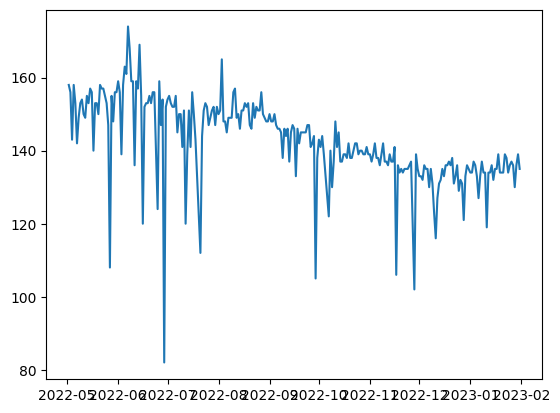

In [405]:
dates=outliersN
t=dates['Time'].apply(lambda x: x.date()).value_counts()# checking outliers
t.plot()
plt.show()

# Converting to 1 HR intervals

In [406]:
outliersN.set_index('Time',inplace= True)
print(outliersN)

                     DC Voltage PV1(V)  DC Voltage PV2(V)  DC Voltage PV3(V)  \
Time                                                                           
2022-05-02 05:55:00               92.2              165.4               94.8   
2022-05-02 06:00:00              200.1              236.2              200.1   
2022-05-02 06:05:00              207.8              344.2              216.1   
2022-05-02 06:12:00              228.1              596.1              228.0   
2022-05-02 06:17:00              240.1              608.1              240.1   
...                                ...                ...                ...   
2023-01-31 18:08:00              473.3              200.1              484.5   
2023-01-31 18:14:00              473.9              200.1              484.9   
2023-01-31 18:19:00              473.8              457.3              445.2   
2023-01-31 18:24:00              384.7              422.0              370.5   
2023-01-31 18:30:00              179.5  

In [407]:

df1=outliersN[['DC Voltage PV1(V)','DC Voltage PV2(V)','DC Voltage PV3(V)',
'DC Voltage PV4(V)','AC Voltage R/U/A(V)','AC Voltage S/V/B(V)',
'AC Voltage T/W/C(V)','AC Output Frequency R(Hz)','Generation of Last Month (Active)(kWh)',
'Inverter Temperature(℃)','Generation Yesterday(kWh)']]
df1=df1.resample("H").mean()

df2=outliersN[['DC Current1(A)','DC Current2(A)','DC Current3(A)',
'DC Current4(A)','Total DC Input Power(W)','AC Current R/U/A(A)',
'AC Current S/V/B(A)','AC Current T/W/C(A)',
'AC Output Total Power (Active)(W)','Power Grid Total Apparent Power(VA)']]
df2=df2.resample("H").sum()
print(df2)

df3=outliersN[['Total Generation (Active)(kWh)','Daily Generation (Active)(kWh)']]
df3=df3.resample("H").max()
print(df3)

                     DC Current1(A)  DC Current2(A)  DC Current3(A)  \
Time                                                                  
2022-05-02 05:00:00             0.1             0.1             0.1   
2022-05-02 06:00:00             5.0             8.8             4.9   
2022-05-02 07:00:00            18.2            30.6            17.5   
2022-05-02 08:00:00            39.6            76.5            39.7   
2022-05-02 09:00:00            52.4           102.9            52.3   
...                             ...             ...             ...   
2023-01-31 14:00:00            45.0            85.4            43.8   
2023-01-31 15:00:00            32.3            60.6            31.6   
2023-01-31 16:00:00            11.5            21.7            11.4   
2023-01-31 17:00:00             4.1             7.9             4.0   
2023-01-31 18:00:00             0.6             0.6             0.6   

                     DC Current4(A)  Total DC Input Power(W)  \
Time        

In [408]:
df1=df1.reset_index()
df2=df2.reset_index()
df3=df3.reset_index()
df1=pd.merge(df1,df2,on='Time')
df1=pd.merge(df1,df3,on='Time')
df1

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),...,DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),Power Grid Total Apparent Power(VA),Total Generation (Active)(kWh),Daily Generation (Active)(kWh)
0,2022-05-02 05:00:00,92.200000,165.400000,94.800000,86.500000,236.800000,236.200000,236.200000,50.000000,3164.0,...,0.1,0.1,43,0.0,0.0,0.0,20,80,117029.0,0.0
1,2022-05-02 06:00:00,455.016667,568.625000,455.058333,572.833333,235.258333,236.941667,236.116667,50.042500,3164.0,...,4.9,4.9,14059,18.8,18.2,18.2,11690,11600,117030.0,0.9
2,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,...,17.5,17.4,53554,73.3,72.3,72.0,51290,51150,117034.0,5.3
3,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,...,39.7,39.0,122764,166.6,166.1,166.4,118640,118680,117044.0,15.3
4,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,...,52.3,51.8,158973,218.5,219.0,217.2,153770,153660,117058.0,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,2023-01-31 14:00:00,619.200000,629.966667,624.000000,661.366667,230.491667,232.733333,230.550000,49.996667,2975.0,...,43.8,43.1,137389,190.9,189.8,190.1,132460,132330,145835.0,87.9
6586,2023-01-31 15:00:00,629.083333,632.408333,631.075000,668.400000,226.241667,228.550000,225.491667,49.916667,2975.0,...,31.6,31.0,99259,140.1,139.5,140.3,95430,95320,145843.0,95.9
6587,2023-01-31 16:00:00,640.845455,635.318182,629.527273,672.436364,227.272727,230.900000,225.063636,49.970000,2975.0,...,11.4,11.2,35764,50.7,49.9,51.7,33550,33440,145846.0,99.0
6588,2023-01-31 17:00:00,615.708333,617.041667,585.808333,616.366667,230.983333,236.133333,229.575000,50.040000,2975.0,...,4.0,3.8,12401,18.8,17.9,19.2,10260,10090,145847.0,100.0


In [409]:
df1.columns

Index(['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)',
       'AC Voltage T/W/C(V)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)', 'Inverter Temperature(℃)',
       'Generation Yesterday(kWh)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)',
       'Power Grid Total Apparent Power(VA)', 'Total Generation (Active)(kWh)',
       'Daily Generation (Active)(kWh)'],
      dtype='object')

In [410]:
#times['actual time']=times['Time'].apply(lambda x: x.time())
#times[times['actual time']==time(6,00,00)]

# Common time interval(6-7)

In [411]:
from datetime import time
solar=df1[df1['Time'].apply(lambda x: x.time()) < time(19,00,00)]
solar

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),...,DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),Power Grid Total Apparent Power(VA),Total Generation (Active)(kWh),Daily Generation (Active)(kWh)
0,2022-05-02 05:00:00,92.200000,165.400000,94.800000,86.500000,236.800000,236.200000,236.200000,50.000000,3164.0,...,0.1,0.1,43,0.0,0.0,0.0,20,80,117029.0,0.0
1,2022-05-02 06:00:00,455.016667,568.625000,455.058333,572.833333,235.258333,236.941667,236.116667,50.042500,3164.0,...,4.9,4.9,14059,18.8,18.2,18.2,11690,11600,117030.0,0.9
2,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,...,17.5,17.4,53554,73.3,72.3,72.0,51290,51150,117034.0,5.3
3,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,...,39.7,39.0,122764,166.6,166.1,166.4,118640,118680,117044.0,15.3
4,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,...,52.3,51.8,158973,218.5,219.0,217.2,153770,153660,117058.0,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,2023-01-31 14:00:00,619.200000,629.966667,624.000000,661.366667,230.491667,232.733333,230.550000,49.996667,2975.0,...,43.8,43.1,137389,190.9,189.8,190.1,132460,132330,145835.0,87.9
6586,2023-01-31 15:00:00,629.083333,632.408333,631.075000,668.400000,226.241667,228.550000,225.491667,49.916667,2975.0,...,31.6,31.0,99259,140.1,139.5,140.3,95430,95320,145843.0,95.9
6587,2023-01-31 16:00:00,640.845455,635.318182,629.527273,672.436364,227.272727,230.900000,225.063636,49.970000,2975.0,...,11.4,11.2,35764,50.7,49.9,51.7,33550,33440,145846.0,99.0
6588,2023-01-31 17:00:00,615.708333,617.041667,585.808333,616.366667,230.983333,236.133333,229.575000,50.040000,2975.0,...,4.0,3.8,12401,18.8,17.9,19.2,10260,10090,145847.0,100.0


In [412]:
solar=solar[solar['Time'].apply(lambda x: x.time()) >= time(6,00,00)]
solar

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),...,DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),Power Grid Total Apparent Power(VA),Total Generation (Active)(kWh),Daily Generation (Active)(kWh)
1,2022-05-02 06:00:00,455.016667,568.625000,455.058333,572.833333,235.258333,236.941667,236.116667,50.042500,3164.0,...,4.9,4.9,14059,18.8,18.2,18.2,11690,11600,117030.0,0.9
2,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,...,17.5,17.4,53554,73.3,72.3,72.0,51290,51150,117034.0,5.3
3,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,...,39.7,39.0,122764,166.6,166.1,166.4,118640,118680,117044.0,15.3
4,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,...,52.3,51.8,158973,218.5,219.0,217.2,153770,153660,117058.0,28.7
5,2022-05-02 10:00:00,605.054545,608.690909,608.763636,642.200000,229.172727,228.072727,227.809091,49.974545,3164.0,...,48.6,48.0,148295,208.2,208.3,207.9,143220,143170,117071.0,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,2023-01-31 14:00:00,619.200000,629.966667,624.000000,661.366667,230.491667,232.733333,230.550000,49.996667,2975.0,...,43.8,43.1,137389,190.9,189.8,190.1,132460,132330,145835.0,87.9
6586,2023-01-31 15:00:00,629.083333,632.408333,631.075000,668.400000,226.241667,228.550000,225.491667,49.916667,2975.0,...,31.6,31.0,99259,140.1,139.5,140.3,95430,95320,145843.0,95.9
6587,2023-01-31 16:00:00,640.845455,635.318182,629.527273,672.436364,227.272727,230.900000,225.063636,49.970000,2975.0,...,11.4,11.2,35764,50.7,49.9,51.7,33550,33440,145846.0,99.0
6588,2023-01-31 17:00:00,615.708333,617.041667,585.808333,616.366667,230.983333,236.133333,229.575000,50.040000,2975.0,...,4.0,3.8,12401,18.8,17.9,19.2,10260,10090,145847.0,100.0


# Removing few columns in weather dataset

In [413]:
w=pd.read_csv("weather_data_may_to_oct.csv")
w=w.rename(columns = {'datetime':'Time'})

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data_may_to_oct.csv'

In [ ]:
w1=w[['Time','temp','dew','humidity','precip','windgust','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','uvindex']]
print(w1)

                     Time  temp   dew  humidity  precip  windgust  windspeed  \
0     2022-05-01T00:00:00  29.5  15.0     41.31     0.0      24.5        8.5   
1     2022-05-01T01:00:00  29.0  15.0     42.56     0.0      29.5        8.5   
2     2022-05-01T02:00:00  27.5  18.2     56.82     0.0      30.6        1.1   
3     2022-05-01T03:00:00  27.0  16.0     50.99     0.0      26.3        8.4   
4     2022-05-01T04:00:00  28.0  17.0     51.25     0.0      23.8       11.2   
...                   ...   ...   ...       ...     ...       ...        ...   
3883  2022-10-09T19:00:00  25.8  21.9     79.31     0.0      20.9       14.1   
3884  2022-10-09T20:00:00  25.1  21.8     81.61     0.0      22.0        9.7   
3885  2022-10-09T21:00:00  24.8  21.9     83.79     0.0      23.8       12.7   
3886  2022-10-09T22:00:00  23.9  21.9     88.59     0.0      27.4        9.4   
3887  2022-10-09T23:00:00  24.3  21.6     85.39     0.0      28.8        4.7   

      winddir  sealevelpressure  cloudc

In [ ]:
w1['Time']= pd.to_datetime(w1['Time'])#converted time to string
w1['Time']= pd.to_datetime(w1['Time'])
w1.dtypes

c:\Users\aksha\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\Users\aksha\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Time                datetime64[ns]
temp                       float64
dew                        float64
humidity                   float64
precip                     float64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation               int64
uvindex                      int64
dtype: object

# Merging weather and solar data

In [ ]:
weather=w1

In [ ]:
d1=pd.merge(solar,weather, on='Time')
print(d1)

                    Time  DC Voltage PV1(V)  DC Voltage PV2(V)  \
0    2022-05-02 06:00:00         455.016667         568.625000   
1    2022-05-02 07:00:00         637.527273         645.463636   
2    2022-05-02 08:00:00         625.583333         625.608333   
3    2022-05-02 09:00:00         604.027273         608.400000   
4    2022-05-02 10:00:00         605.054545         608.690909   
...                  ...                ...                ...   
2088 2022-10-09 14:00:00         731.608333         729.033333   
2089 2022-10-09 15:00:00         652.225000         658.508333   
2090 2022-10-09 16:00:00         616.900000         634.436364   
2091 2022-10-09 17:00:00         552.183333         577.425000   
2092 2022-10-09 18:00:00         362.733333         293.066667   

      DC Voltage PV3(V)  DC Voltage PV4(V)  AC Voltage R/U/A(V)  \
0            455.058333         572.833333           235.258333   
1            608.336364         672.427273           234.718182   
2     

In [ ]:
d1

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Inverter Temperature(℃),Generation Yesterday(kWh),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),Power Grid Total Apparent Power(VA),Total Generation (Active)(kWh),Daily Generation (Active)(kWh),temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex
0,2022-05-02 06:00:00,455.016667,568.625000,455.058333,572.833333,235.258333,236.941667,236.116667,50.042500,3164.0,36.025000,126.9,5.0,8.8,4.9,4.9,14059,18.8,18.2,18.2,11690,11600,117030.0,0.9,29.0,19.0,54.83,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0
1,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,41.400000,126.9,18.2,30.6,17.5,17.4,53554,73.3,72.3,72.0,51290,51150,117034.0,5.3,29.0,20.9,61.51,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0
2,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,48.441667,126.9,39.6,76.5,39.7,39.0,122764,166.6,166.1,166.4,118640,118680,117044.0,15.3,30.7,20.8,55.32,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2
3,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,56.872727,126.9,52.4,102.9,52.3,51.8,158973,218.5,219.0,217.2,153770,153660,117058.0,28.7,32.1,19.3,46.84,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5
4,2022-05-02 10:00:00,605.054545,608.690909,608.763636,642.200000,229.172727,228.072727,227.809091,49.974545,3164.0,57.763636,126.9,49.2,96.1,48.6,48.0,148295,208.2,208.3,207.9,143220,143170,117071.0,41.5,33.1,18.2,41.40,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2022-10-09 14:00:00,731.608333,729.033333,732.191667,767.866667,0.000000,0.000000,0.000000,0.000000,2835.0,38.358333,131.9,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,133446.0,67.0,29.4,21.0,60.90,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,8
2089,2022-10-09 15:00:00,652.225000,658.508333,663.175000,693.491667,175.350000,176.000000,175.783333,33.358333,2835.0,42.691667,131.9,38.1,70.9,36.8,36.8,114152,140.5,139.6,139.2,110820,110840,133455.0,76.0,28.9,21.6,64.58,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,6
2090,2022-10-09 16:00:00,616.900000,634.436364,636.845455,673.309091,255.236364,257.309091,255.709091,49.995455,2835.0,44.054545,131.9,19.5,37.6,18.4,18.6,59444,74.6,74.2,74.0,56970,47870,133461.0,81.2,28.9,21.5,64.57,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,5
2091,2022-10-09 17:00:00,552.183333,577.425000,537.316667,581.341667,249.091667,250.383333,250.783333,50.011667,2835.0,39.266667,131.9,4.8,8.9,4.6,4.4,14062,19.0,18.3,17.9,12100,12000,133462.0,82.4,28.0,21.1,66.25,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,3


In [ ]:
d1.columns

Index(['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)',
       'AC Voltage T/W/C(V)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)', 'Inverter Temperature(℃)',
       'Generation Yesterday(kWh)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)',
       'Power Grid Total Apparent Power(VA)', 'Total Generation (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'temp', 'dew', 'humidity', 'precip',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'uvindex'],
      dtype='object')

In [ ]:
d1=d1[['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)','AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)',
       'AC Voltage T/W/C(V)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)', 'Inverter Temperature(℃)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)',
       'Power Grid Total Apparent Power(VA)', 'Daily Generation (Active)(kWh)','Total Generation (Active)(kWh)',
       'temp', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'uvindex']]

In [ ]:
d1['DC total voltage (v)']=d1['DC Voltage PV1(V)']+d1['DC Voltage PV2(V)']+d1['DC Voltage PV4(V)']+d1['DC Voltage PV3(V)']

In [ ]:
d1['DC total current(A)']=d1['DC Current1(A)']+d1['DC Current2(A)']+d1['DC Current3(A)']+d1['DC Current4(A)']

In [ ]:
d1['AC total voltage (v)']=d1['AC Voltage R/U/A(V)']+d1['AC Voltage S/V/B(V)']+d1['AC Voltage T/W/C(V)']

In [ ]:
d1['AC total current(A)']=d1['AC Current R/U/A(A)']+d1[ 'AC Current S/V/B(A)']+d1[ 'AC Current T/W/C(A)']

In [ ]:
d1=d1[['Time', 'DC total voltage (v)','DC total current(A)',  'Total DC Input Power(W)',
       'AC total voltage (v)','AC total current(A)', 'AC Output Total Power (Active)(W)', 
       'AC Output Frequency R(Hz)', 'Inverter Temperature(℃)',
       'Generation of Last Month (Active)(kWh)', 'Daily Generation (Active)(kWh)','Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)', 
       'temp', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'uvindex','Daily Generation (Active)(kWh)']]

In [ ]:
d1

,Time,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),Generation of Last Month (Active)(kWh),Daily Generation (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,Daily Generation (Active)(kWh)
0,2022-05-02 06:00:00,2051.533333,23.6,14059,708.316667,55.2,11690,50.042500,36.025000,3164.0,0.9,117030.0,11600,29.0,19.0,54.83,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0,0.9
1,2022-05-02 07:00:00,2563.754545,83.7,53554,707.018182,217.6,51290,50.061818,41.400000,3164.0,5.3,117034.0,51150,29.0,20.9,61.51,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0,5.3
2,2022-05-02 08:00:00,2534.466667,194.8,122764,711.100000,499.1,118640,50.080000,48.441667,3164.0,15.3,117044.0,118680,30.7,20.8,55.32,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2,15.3
3,2022-05-02 09:00:00,2459.145455,259.4,158973,700.600000,654.7,153770,50.028182,56.872727,3164.0,28.7,117058.0,153660,32.1,19.3,46.84,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5,28.7
4,2022-05-02 10:00:00,2464.709091,241.9,148295,685.054545,624.4,143220,49.974545,57.763636,3164.0,41.5,117071.0,143170,33.1,18.2,41.40,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2022-10-09 14:00:00,2960.700000,0.0,0,0.000000,0.0,0,0.000000,38.358333,2835.0,67.0,133446.0,0,29.4,21.0,60.90,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,8,67.0
2089,2022-10-09 15:00:00,2667.400000,182.6,114152,527.133333,419.3,110820,33.358333,42.691667,2835.0,76.0,133455.0,110840,28.9,21.6,64.58,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,6,76.0
2090,2022-10-09 16:00:00,2561.490909,94.1,59444,768.254545,222.8,56970,49.995455,44.054545,2835.0,81.2,133461.0,47870,28.9,21.5,64.57,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,5,81.2
2091,2022-10-09 17:00:00,2248.266667,22.7,14062,750.258333,55.2,12100,50.011667,39.266667,2835.0,82.4,133462.0,12000,28.0,21.1,66.25,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,3,82.4


In [ ]:

d1.feature_names=['Time', 'DC total voltage (v)', 'DC total current(A)',
       'Total DC Input Power(W)', 'AC total voltage (v)',
       'AC total current(A)', 'AC Output Total Power (Active)(W)',
       'AC Output Frequency R(Hz)', 'Inverter Temperature(℃)',
       'Power Grid Total Apparent Power(VA)', 'temp', 'dew', 'humidity',
       'precip', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'uvindex']

c:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


In [ ]:
d1.target = d1["Daily Generation (Active)(kWh)"] 

c:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
d1.columns

Index(['Time', 'DC total voltage (v)', 'DC total current(A)',
       'Total DC Input Power(W)', 'AC total voltage (v)',
       'AC total current(A)', 'AC Output Total Power (Active)(W)',
       'AC Output Frequency R(Hz)', 'Inverter Temperature(℃)',
       'Generation of Last Month (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)', 'temp', 'dew', 'humidity',
       'precip', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'uvindex',
       'Daily Generation (Active)(kWh)'],
      dtype='object')

In [ ]:
type(d1)

pandas.core.frame.DataFrame

In [ ]:
x = d1.drop("Daily Generation (Active)(kWh)",axis=1)   #Feature Matrix
y = d1["Daily Generation (Active)(kWh)"] 

In [ ]:
x.head()

,Time,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),Generation of Last Month (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex
0,2022-05-02 06:00:00,2051.533333,23.6,14059,708.316667,55.2,11690,50.042500,36.025000,3164.0,117030.0,11600,29.0,19.0,54.83,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0
1,2022-05-02 07:00:00,2563.754545,83.7,53554,707.018182,217.6,51290,50.061818,41.400000,3164.0,117034.0,51150,29.0,20.9,61.51,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0
2,2022-05-02 08:00:00,2534.466667,194.8,122764,711.100000,499.1,118640,50.080000,48.441667,3164.0,117044.0,118680,30.7,20.8,55.32,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2
3,2022-05-02 09:00:00,2459.145455,259.4,158973,700.600000,654.7,153770,50.028182,56.872727,3164.0,117058.0,153660,32.1,19.3,46.84,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5
4,2022-05-02 10:00:00,2464.709091,241.9,148295,685.054545,624.4,143220,49.974545,57.763636,3164.0,117071.0,143170,33.1,18.2,41.40,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6


In [ ]:
x.corr()

,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),Generation of Last Month (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex
DC total voltage (v),1.000000,0.245825,0.270454,-0.060383,0.273204,0.272213,-0.081360,0.173004,0.023814,-0.006786,0.271182,0.033831,0.086863,-0.007479,-0.028379,0.104815,-0.036314,0.078785,-0.038902,0.024761,0.052163,0.165074,0.163935
DC total current(A),0.245825,1.000000,0.998841,0.057360,0.997342,0.998662,0.043571,0.868046,-0.006623,-0.095078,0.998652,0.421786,0.080754,-0.353051,-0.059117,-0.190027,-0.049310,0.062827,0.189456,-0.397689,0.195015,0.645371,0.645799
Total DC Input Power(W),0.270454,0.998841,1.000000,0.060665,0.998381,0.999977,0.045408,0.857558,-0.011507,-0.081804,0.999948,0.404980,0.091287,-0.336547,-0.060102,-0.175789,-0.043002,0.069167,0.191745,-0.383062,0.191735,0.636529,0.637054
AC total voltage (v),-0.060383,0.057360,0.060665,1.000000,0.034892,0.060710,0.837401,-0.031625,-0.239373,0.159833,0.060576,-0.123423,0.056416,0.108808,0.009716,0.058133,0.046601,-0.004300,-0.012858,-0.003284,-0.032942,-0.049673,-0.052729
AC total current(A),0.273204,0.997342,0.998381,0.034892,1.000000,0.998286,0.043998,0.863830,0.006937,-0.094469,0.998259,0.414018,0.090598,-0.343674,-0.060544,-0.178277,-0.048152,0.071259,0.188194,-0.382521,0.193648,0.638879,0.639468
AC Output Total Power (Active)(W),0.272213,0.998662,0.999977,0.060710,0.998286,1.000000,0.044612,0.857007,-0.012182,-0.080523,0.999966,0.404093,0.092628,-0.335564,-0.060481,-0.175291,-0.042813,0.069481,0.192343,-0.382387,0.191580,0.636490,0.637023
AC Output Frequency R(Hz),-0.081360,0.043571,0.045408,0.837401,0.043998,0.044612,1.000000,0.031329,-0.041501,0.016765,0.044565,-0.035592,0.045367,0.045233,0.007473,0.008004,-0.017003,-0.001207,-0.008162,0.000347,-0.008200,-0.033138,-0.035477
Inverter Temperature(℃),0.173004,0.868046,0.857558,-0.031625,0.863830,0.857007,0.031329,1.000000,0.094570,-0.291019,0.857073,0.765218,-0.042244,-0.670837,-0.075402,-0.386053,-0.202723,-0.045422,0.033422,-0.550194,0.273304,0.785622,0.785484
Generation of Last Month (Active)(kWh),0.023814,-0.006623,-0.011507,-0.239373,0.006937,-0.012182,-0.041501,0.094570,1.000000,-0.399180,-0.012203,0.167153,-0.088533,-0.159651,-0.002219,-0.004709,-0.092198,0.088923,-0.049545,-0.072001,0.010929,-0.029609,-0.025792
Total Generation (Active)(kWh),-0.006786,-0.095078,-0.081804,0.159833,-0.094469,-0.080523,0.016765,-0.291019,-0.399180,1.000000,-0.080762,-0.508896,0.338544,0.515874,-0.006337,0.049187,0.008465,0.129428,0.298919,0.287089,-0.114564,-0.059050,-0.057616


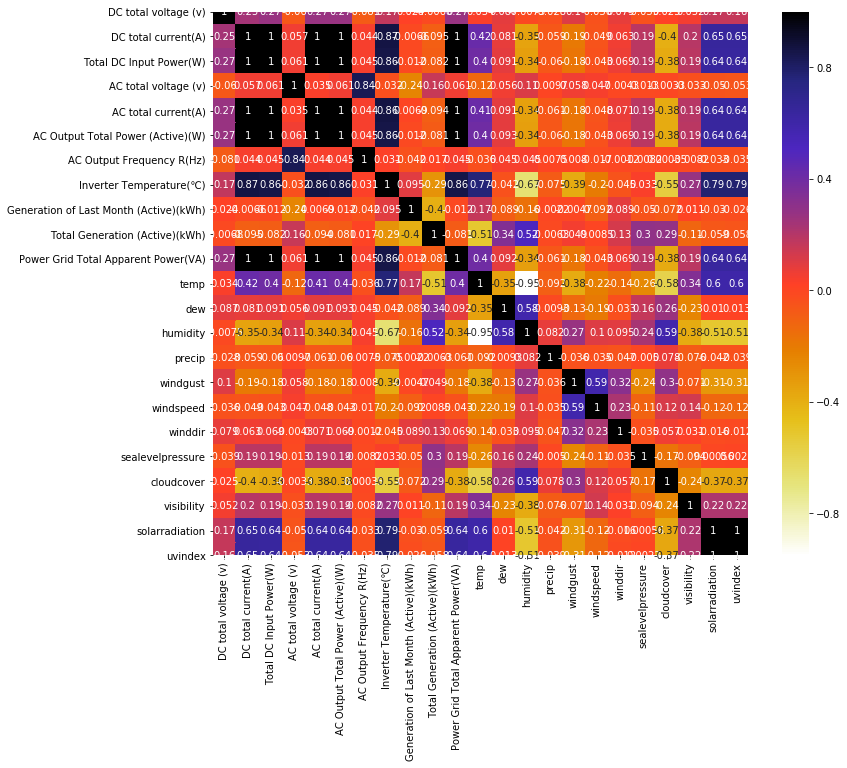

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = x.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(x, 0.8)
len(set(corr_features))

8

In [ ]:
corr_features

{'AC Output Frequency R(Hz)',
 'AC Output Total Power (Active)(W)',
 'AC total current(A)',
 'Inverter Temperature(℃)',
 'Power Grid Total Apparent Power(VA)',
 'Total DC Input Power(W)',
 'humidity',
 'uvindex'}

In [ ]:
d2=x.drop(corr_features,axis=1)

In [ ]:
d2

,Time,DC total voltage (v),DC total current(A),AC total voltage (v),Generation of Last Month (Active)(kWh),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation
0,2022-05-02 06:00:00,2051.533333,23.6,708.316667,3164.0,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0
1,2022-05-02 07:00:00,2563.754545,83.7,707.018182,3164.0,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22
2,2022-05-02 08:00:00,2534.466667,194.8,711.100000,3164.0,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159
3,2022-05-02 09:00:00,2459.145455,259.4,700.600000,3164.0,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457
4,2022-05-02 10:00:00,2464.709091,241.9,685.054545,3164.0,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2022-10-09 14:00:00,2960.700000,0.0,0.000000,2835.0,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752
2089,2022-10-09 15:00:00,2667.400000,182.6,527.133333,2835.0,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606
2090,2022-10-09 16:00:00,2561.490909,94.1,768.254545,2835.0,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507
2091,2022-10-09 17:00:00,2248.266667,22.7,750.258333,2835.0,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295


In [ ]:
d2.columns

Index(['Time', 'DC total voltage (v)', 'DC total current(A)',
       'AC total voltage (v)', 'Generation of Last Month (Active)(kWh)',
       'Total Generation (Active)(kWh)', 'temp', 'dew', 'precip', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation'],
      dtype='object')

In [ ]:
d= d1.iloc[:,-1:]
d

,Daily Generation (Active)(kWh)
0,0.9
1,5.3
2,15.3
3,28.7
4,41.5
...,...
2088,67.0
2089,76.0
2090,81.2
2091,82.4


In [ ]:
d2=d2.join(d)

In [ ]:
d2.to_csv('finalData.csv')

In [ ]:
d2.drop('Generation of Last Month (Active)(kWh)',axis=1,inplace=True)

In [ ]:
d2

,Time,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
0,2022-05-02 06:00:00,2051.533333,23.6,708.316667,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0.9
1,2022-05-02 07:00:00,2563.754545,83.7,707.018182,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,5.3
2,2022-05-02 08:00:00,2534.466667,194.8,711.100000,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,15.3
3,2022-05-02 09:00:00,2459.145455,259.4,700.600000,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,28.7
4,2022-05-02 10:00:00,2464.709091,241.9,685.054545,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2022-10-09 14:00:00,2960.700000,0.0,0.000000,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,67.0
2089,2022-10-09 15:00:00,2667.400000,182.6,527.133333,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,76.0
2090,2022-10-09 16:00:00,2561.490909,94.1,768.254545,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,81.2
2091,2022-10-09 17:00:00,2248.266667,22.7,750.258333,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,82.4


In [ ]:
d2.to_csv('finalData.csv')

In [ ]:
final=pd.read_csv("finalData.csv")
final.isnull().sum()

Unnamed: 0                         0
Time                               0
DC total voltage (v)              72
DC total current(A)                0
AC total voltage (v)              72
Total Generation (Active)(kWh)    72
temp                               0
dew                                0
precip                             0
windgust                           0
windspeed                          0
winddir                            0
sealevelpressure                   0
cloudcover                         0
visibility                         0
solarradiation                     0
Daily Generation (Active)(kWh)    72
dtype: int64

In [ ]:
final[final['Daily Generation (Active)(kWh)'].isna()]

,Unnamed: 0,Time,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
325,325,2022-05-27 06:00:00,NaN,0.0,NaN,NaN,26.0,18.0,0.0,33.5,13.0,265.0,1011.0,89.0,5.0,0,NaN
326,326,2022-05-27 07:00:00,NaN,0.0,NaN,NaN,25.1,20.6,0.0,34.9,3.0,329.0,1011.0,55.7,5.0,3,NaN
327,327,2022-05-27 08:00:00,NaN,0.0,NaN,NaN,27.8,20.3,0.0,33.8,6.9,268.0,1009.2,57.6,5.1,12,NaN
328,328,2022-05-27 09:00:00,NaN,0.0,NaN,NaN,29.1,21.9,0.0,31.0,10.7,289.0,1012.0,50.0,6.0,94,NaN
595,595,2022-06-16 16:00:00,NaN,0.0,NaN,NaN,28.4,23.1,0.0,9.4,5.8,270.0,1006.8,50.0,6.0,110,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2051,2022-10-06 16:00:00,NaN,0.0,NaN,NaN,23.7,21.9,0.0,11.2,12.7,120.0,1006.0,100.0,3.8,63,NaN
2052,2052,2022-10-06 17:00:00,NaN,0.0,NaN,NaN,22.2,21.3,3.0,10.1,1.1,50.0,1005.4,98.4,4.0,13,NaN
2053,2053,2022-10-06 18:00:00,NaN,0.0,NaN,NaN,22.9,21.9,0.0,18.0,5.8,80.0,1007.0,98.4,4.9,7,NaN
2054,2054,2022-10-07 06:00:00,NaN,0.0,NaN,NaN,22.0,21.0,0.0,19.1,7.6,156.3,1009.0,88.0,3.5,0,NaN


In [ ]:
final.dropna(inplace=True)

In [ ]:
final

,Unnamed: 0,Time,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
0,0,2022-05-02 06:00:00,2051.533333,23.6,708.316667,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0.9
1,1,2022-05-02 07:00:00,2563.754545,83.7,707.018182,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,5.3
2,2,2022-05-02 08:00:00,2534.466667,194.8,711.100000,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,15.3
3,3,2022-05-02 09:00:00,2459.145455,259.4,700.600000,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,28.7
4,4,2022-05-02 10:00:00,2464.709091,241.9,685.054545,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2088,2022-10-09 14:00:00,2960.700000,0.0,0.000000,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,67.0
2089,2089,2022-10-09 15:00:00,2667.400000,182.6,527.133333,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,76.0
2090,2090,2022-10-09 16:00:00,2561.490909,94.1,768.254545,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,81.2
2091,2091,2022-10-09 17:00:00,2248.266667,22.7,750.258333,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,82.4


In [ ]:
final.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
final=obj_to_DT(final,'Time')
final.dtypes

Time                              datetime64[ns]
DC total voltage (v)                     float64
DC total current(A)                      float64
AC total voltage (v)                     float64
Total Generation (Active)(kWh)           float64
temp                                     float64
dew                                      float64
precip                                   float64
windgust                                 float64
windspeed                                float64
winddir                                  float64
sealevelpressure                         float64
cloudcover                               float64
visibility                               float64
solarradiation                             int64
Daily Generation (Active)(kWh)           float64
dtype: object

In [ ]:
final.insert(1,'Date',final['Time'].apply(lambda x: x.date()))
final

,Time,Date,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
0,2022-05-02 06:00:00,2022-05-02,2051.533333,23.6,708.316667,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0.9
1,2022-05-02 07:00:00,2022-05-02,2563.754545,83.7,707.018182,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,5.3
2,2022-05-02 08:00:00,2022-05-02,2534.466667,194.8,711.100000,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,15.3
3,2022-05-02 09:00:00,2022-05-02,2459.145455,259.4,700.600000,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,28.7
4,2022-05-02 10:00:00,2022-05-02,2464.709091,241.9,685.054545,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2022-10-09 14:00:00,2022-10-09,2960.700000,0.0,0.000000,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,67.0
2089,2022-10-09 15:00:00,2022-10-09,2667.400000,182.6,527.133333,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,76.0
2090,2022-10-09 16:00:00,2022-10-09,2561.490909,94.1,768.254545,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,81.2
2091,2022-10-09 17:00:00,2022-10-09,2248.266667,22.7,750.258333,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,82.4


In [ ]:
final['Time']=final['Time'].apply(lambda x: x.time())
final

,Time,Date,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
0,06:00:00,2022-05-02,2051.533333,23.6,708.316667,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0.9
1,07:00:00,2022-05-02,2563.754545,83.7,707.018182,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,5.3
2,08:00:00,2022-05-02,2534.466667,194.8,711.100000,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,15.3
3,09:00:00,2022-05-02,2459.145455,259.4,700.600000,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,28.7
4,10:00:00,2022-05-02,2464.709091,241.9,685.054545,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,14:00:00,2022-10-09,2960.700000,0.0,0.000000,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,67.0
2089,15:00:00,2022-10-09,2667.400000,182.6,527.133333,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,76.0
2090,16:00:00,2022-10-09,2561.490909,94.1,768.254545,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,81.2
2091,17:00:00,2022-10-09,2248.266667,22.7,750.258333,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,82.4


In [ ]:
final=obj_to_DT(final,'Date')
final.dtypes

Time                                      object
Date                              datetime64[ns]
DC total voltage (v)                     float64
DC total current(A)                      float64
AC total voltage (v)                     float64
Total Generation (Active)(kWh)           float64
temp                                     float64
dew                                      float64
precip                                   float64
windgust                                 float64
windspeed                                float64
winddir                                  float64
sealevelpressure                         float64
cloudcover                               float64
visibility                               float64
solarradiation                             int64
Daily Generation (Active)(kWh)           float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
final['Time']= label_encoder.fit_transform(final['Time'])

In [ ]:
final['Date']= final['Date'].apply(lambda x: x.date() - date(year=2022,month=1,day=1))


In [ ]:
final

,Time,Date,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
0,0,121 days,2051.533333,23.6,708.316667,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0.9
1,1,121 days,2563.754545,83.7,707.018182,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,5.3
2,2,121 days,2534.466667,194.8,711.100000,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,15.3
3,3,121 days,2459.145455,259.4,700.600000,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,28.7
4,4,121 days,2464.709091,241.9,685.054545,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,8,281 days,2960.700000,0.0,0.000000,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,67.0
2089,9,281 days,2667.400000,182.6,527.133333,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,76.0
2090,10,281 days,2561.490909,94.1,768.254545,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,81.2
2091,11,281 days,2248.266667,22.7,750.258333,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,82.4


In [ ]:
final['Date']= final['Date'].apply(lambda x: str(x))

In [ ]:
final

,Time,Date,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
0,0,121 days 00:00:00,2051.533333,23.6,708.316667,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0.9
1,1,121 days 00:00:00,2563.754545,83.7,707.018182,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,5.3
2,2,121 days 00:00:00,2534.466667,194.8,711.100000,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,15.3
3,3,121 days 00:00:00,2459.145455,259.4,700.600000,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,28.7
4,4,121 days 00:00:00,2464.709091,241.9,685.054545,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,8,281 days 00:00:00,2960.700000,0.0,0.000000,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,67.0
2089,9,281 days 00:00:00,2667.400000,182.6,527.133333,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,76.0
2090,10,281 days 00:00:00,2561.490909,94.1,768.254545,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,81.2
2091,11,281 days 00:00:00,2248.266667,22.7,750.258333,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,82.4


In [ ]:
final['Date']= final['Date'].apply(lambda x: int(x[0:3]))

In [ ]:
final.dtypes

Time                                int32
Date                                int64
DC total voltage (v)              float64
DC total current(A)               float64
AC total voltage (v)              float64
Total Generation (Active)(kWh)    float64
temp                              float64
dew                               float64
precip                            float64
windgust                          float64
windspeed                         float64
winddir                           float64
sealevelpressure                  float64
cloudcover                        float64
visibility                        float64
solarradiation                      int64
Daily Generation (Active)(kWh)    float64
dtype: object

In [ ]:
final

,Time,Date,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
0,0,121,2051.533333,23.6,708.316667,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0.9
1,1,121,2563.754545,83.7,707.018182,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,5.3
2,2,121,2534.466667,194.8,711.100000,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,15.3
3,3,121,2459.145455,259.4,700.600000,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,28.7
4,4,121,2464.709091,241.9,685.054545,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,8,281,2960.700000,0.0,0.000000,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,67.0
2089,9,281,2667.400000,182.6,527.133333,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,76.0
2090,10,281,2561.490909,94.1,768.254545,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,81.2
2091,11,281,2248.266667,22.7,750.258333,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,82.4


In [ ]:
final.isnull().sum()

Time                              0
Date                              0
DC total voltage (v)              0
DC total current(A)               0
AC total voltage (v)              0
Total Generation (Active)(kWh)    0
temp                              0
dew                               0
precip                            0
windgust                          0
windspeed                         0
winddir                           0
sealevelpressure                  0
cloudcover                        0
visibility                        0
solarradiation                    0
Daily Generation (Active)(kWh)    0
dtype: int64

In [ ]:
final.rename(columns = {'Date':'no_of_days'}, inplace = True)

In [ ]:
final.drop(['DC total voltage (v)','DC total current(A)','Total Generation (Active)(kWh)','AC total voltage (v)'],inplace=True,axis=1)

# Fitting model

In [ ]:
X=final.drop('Daily Generation (Active)(kWh)',axis=1)
Y=final['Daily Generation (Active)(kWh)']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=False)

In [ ]:
"""x_train.drop(['no_of_days','Time'],inplace=True,axis=1)
x_test.drop(['no_of_days','Time'],inplace=True,axis=1)"""

"x_train.drop(['no_of_days','Time'],inplace=True,axis=1)\nx_test.drop(['no_of_days','Time'],inplace=True,axis=1)"

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(x_train,y_train)
y_predict=l.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_lr=mean_squared_error(y_true=y_test,y_pred=y_predict)
mse_lr

485.03447807472907

In [ ]:
import math
rmse_lr=math.sqrt(mse_lr)
rmse_lr

22.023498315997145

In [ ]:
from sklearn.metrics import r2_score
r2_lr=r2_score(y_true=y_test,y_pred=y_predict)
print(r2_lr)

0.7386729560616851


In [ ]:
x_test.shape

(506, 12)

In [ ]:
y_test.shape

(506,)

In [ ]:
y_predict.shape

(506,)

In [ ]:
x_test

,Time,no_of_days,temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation
1555,8,240,26.6,23.6,0.0,7.6,4.2,71.2,1008.1,90.7,4.1,819
1556,9,240,25.7,23.9,0.0,5.8,6.4,1.0,1009.0,90.7,4.1,373
1557,10,240,26.4,24.7,0.0,7.6,6.8,356.0,1009.0,90.7,5.0,156
1558,11,240,27.7,23.9,0.0,5.8,4.6,332.0,1006.9,76.9,3.8,102
1559,12,240,25.4,23.8,0.0,4.7,7.0,356.0,1010.0,90.7,3.3,79
...,...,...,...,...,...,...,...,...,...,...,...,...
2088,8,281,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752
2089,9,281,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606
2090,10,281,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507
2091,11,281,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295


In [ ]:
y_test

1555    34.1
1556    46.4
1557    52.5
1558    54.4
1559    54.8
        ... 
2088    67.0
2089    76.0
2090    81.2
2091    82.4
2092    82.4
Name: Daily Generation (Active)(kWh), Length: 506, dtype: float64

c:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'Daily Generation of Output')

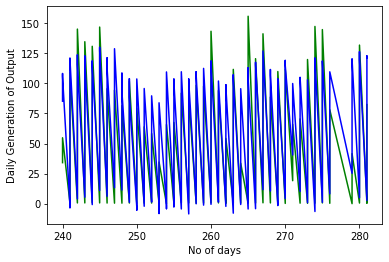

In [ ]:
import matplotlib.pyplot as plt
tt=x_test.sort_values(by='no_of_days')
plt.plot(tt['no_of_days'],y_test,color="green")
plt.plot(tt['no_of_days'],y_predict,color='blue')
plt.xlabel('No of days')
plt.ylabel('Daily Generation of Output')

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=3)
dt.fit(x_train,y_train)
y_predict1=dt.predict(x_test)

In [ ]:
r2_dt=r2_score(y_true=y_test,y_pred=y_predict1)
print(r2_dt)

0.7426007988151693


In [ ]:
mse_dt=mean_squared_error(y_true=y_test,y_pred=y_predict1)
mse_dt

477.74422930757316

# Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb= GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = 1)
gb.fit(x_train,y_train)
y_predict2=gb.predict(x_test)

In [ ]:
r2_gb=r2_score(y_true=y_test,y_pred=y_predict2)
print(r2_gb)

0.8160461648318115


In [ ]:
mse_gb=mean_squared_error(y_true=y_test,y_pred=y_predict2)
mse_gb

341.42640228122735

# XGBoost

In [ ]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
xgb= xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

[19:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
r2_xgb=r2_score(y_true=y_test,y_pred=pred)
print(r2_xgb)

0.8172256997291458


In [ ]:
rmse_xgb = np.sqrt(MSE(y_test, pred))
print(rmse_xgb)

18.41839118041583


# Comparing algorithms

In [ ]:
#Accuracy based on R square error
print('Linear regression:',r2_lr*100,'%')
print('Decision Tree:',r2_dt*100,'%')
print('Gradient Boost:',r2_gb*100,'%')
print('XGBoost:',r2_xgb*100,'%')

Linear regression: 73.86729560616851 %
Decision Tree: 74.26007988151693 %
Gradient Boost: 81.60461648318115 %
XGBoost: 81.72256997291458 %


In [ ]:
#linear regression
y_fitted_l=l.predict(X)
residual_l=y_fitted_l-Y
corr_l=np.corrcoef(y_fitted_l,Y)
print('correlation coefficient: ',corr_l[0,1])

correlation coefficient:  0.9309837683646424


In [ ]:
#decision tree
y_fitted_dt=dt.predict(X)
residual_dt=y_fitted_dt-Y
corr_dt=np.corrcoef(y_fitted_dt,Y)
print('correlation coefficient: ',corr_dt[0,1])

correlation coefficient:  0.9211069527004629


In [ ]:
#gradient boost
y_fitted_gb=gb.predict(X)
residual_gb=y_fitted_gb-Y
corr_gb=np.corrcoef(y_fitted_gb,Y)
print('correlation coefficient: ',corr_gb[0,1])

correlation coefficient:  0.9511893047933155


In [ ]:
#xgboost
y_fitted_xgb=xgb.predict(X)
residual_xgb=y_fitted_xgb-Y
corr_xgb=np.corrcoef(y_fitted_xgb,Y)
print('correlation coefficient: ',corr_xgb[0,1])

correlation coefficient:  0.9714566712521325


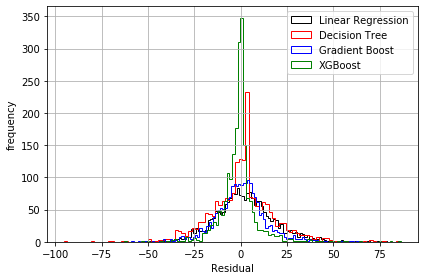

In [ ]:
fig, ax = plt.subplots()
ax.hist(residual_l, bins=100, color="black", label='Linear Regression', histtype='step')
ax.hist(residual_dt, bins=100, color="red", label='Decision Tree', histtype='step')
ax.hist(residual_gb, bins=100, color="blue", label='Gradient Boost', histtype='step')
ax.hist(residual_xgb, bins=100, color="green", label='XGBoost', histtype='step')
ax.set_xlabel('Residual')
ax.set_ylabel('frequency')
ax.legend(loc='upper right')
ax.grid(True)
fig.tight_layout()
plt.rcParams["figure.figsize"] = [6,4]
plt.show()

# Predicting output

In [ ]:
x=final[final['no_of_days']==250]
x_final=x[x['Time']==6]

In [ ]:
print(x_final)

      Time  no_of_days  temp   dew  precip  windgust  windspeed  winddir  \
1683     6         250  25.4  23.8     0.0       9.0        5.0    319.0   

      sealevelpressure  cloudcover  visibility  solarradiation  \
1683            1009.0        89.1         6.0             837   

      Daily Generation (Active)(kWh)  
1683                            53.0  


In [ ]:
tobe=x_final.drop(['Daily Generation (Active)(kWh)'],axis=1)
print(tobe)

      Time  no_of_days  temp   dew  precip  windgust  windspeed  winddir  \
1683     6         250  25.4  23.8     0.0       9.0        5.0    319.0   

      sealevelpressure  cloudcover  visibility  solarradiation  
1683            1009.0        89.1         6.0             837  


In [ ]:
y_tobe=xgb.predict(tobe)
print(y_tobe)

[58.16966]
